# JUMPlus Python Project 2

## Marvel Dataset Basic Operations

## by Nicholas Crossman

As before, we import `pandas` and load the data in from `characters_stats.csv`.

In [3]:
import pandas as pd

data = pd.read_csv("characters_stats.csv")

Now that we've read the `.csv`, let's show the first 5 records and get the number of rows and columns.

In [4]:
data.head().style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [5]:
info = data.shape
rows = str(info[0])
cols = str(info[1])
print("Rows: " + rows)
print("Columns: " + cols)

Rows: 611
Columns: 9


The first 5 entries show `good` and `bad` as possible values for the `Alignment` variable, but we should check to make sure. 

The `value_counts()` method will show us what options are available.

In [6]:
alignments = data['Alignment'].value_counts()
print(alignments)

good       432
bad        165
neutral     11
Name: Alignment, dtype: int64


Here we can see there are three possible values: good, bad, and neutral.

## Heroes Queries

Next, let's find the first 5 superheroes with `good` alignment.

In [49]:
heroes = data[data['Alignment'] == 'good']
first_5_heroes = heroes.head()
first_5_heroes.style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320


Let's find the top 5 fastest heroes.

In [50]:
fastest_heroes = heroes.nlargest(5, 'Speed')
fastest_heroes.style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
85,Black Bolt,good,75,67,100,84,100,56,482
229,Flash I,good,63,10,100,50,57,32,312
230,Flash II,good,63,10,100,60,66,32,331
231,Flash III,good,63,10,100,60,83,32,348
232,Flash IV,good,63,10,100,32,59,48,312


Let's see the top 5 heroes ranked by `Power`.

In [51]:
strongest_heroes = heroes.nlargest(5, 'Power')
strongest_heroes.style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335


They're all at 100 `Power`. How many heroes have 100 `Power` in total?

In [28]:
count_strongest_heroes = heroes[heroes['Power'] == 100].shape[0]
print("Heroes with 100 Power: " + str(count_strongest_heroes))

Heroes with 100 Power: 33


Let's see all records with heroes of 100 Power.

In [29]:
heroes_max_power = heroes[heroes['Power'] == 100]
heroes_max_power.style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
69,Beta Ray Bill,good,63,80,35,95,100,84,457
70,Beyonder,good,88,100,23,100,100,56,467
85,Black Bolt,good,75,67,100,84,100,56,482
129,Cable,good,88,48,23,56,100,80,395
185,Deadman,good,50,10,33,100,100,42,335
196,Doctor Fate,good,81,16,25,80,100,50,352
198,Doctor Strange,good,100,10,12,84,100,60,366
204,Dr Manhattan,good,88,32,42,95,100,42,399
226,Firestorm,good,50,53,58,56,100,42,359
251,Goku,good,56,100,75,90,100,100,521


Let's get the `Total` attribute of the top 5 strongest heroes.

In [18]:
strongest_heroes[['Name','Total']]

,Name,Total
69,Beta Ray Bill,457
70,Beyonder,467
85,Black Bolt,482
129,Cable,395
185,Deadman,335


## Visualizations

Python notebooks have useful methods for creating graphs and plots. Let's make a simple bar plot 
of the top 5 most powerful heroes we just found.

<Figure size 432x288 with 0 Axes>

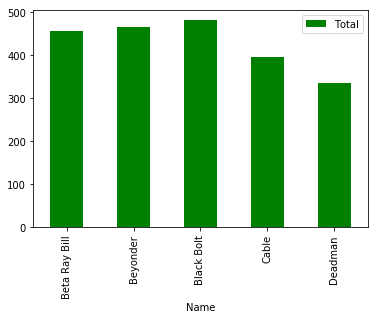

In [20]:
import matplotlib.pyplot as plt

plt.figure() # sets up the canvas

strongest_heroes.plot.bar(x='Name', y='Total', color='green')

After working with the heroes, let's do some analysis on the villains. 
We start by finding all characters with the `bad` Alignment.

In [23]:
villains = data[data['Alignment'] == 'bad']
villains.head().style

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5


Let's find the top 5 fastest villains.

In [25]:
fastest_villains = villains.nlargest(5, 'Speed')
fastest_villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
535,Superboy-Prime,bad,94,100,100,100,100,85,579
610,Zoom,bad,50,10,100,28,72,28,288
242,General Zod,bad,94,100,96,100,94,95,579


Let's use the same `nlargest` method to find the top 5 smartest villains.

In [26]:
smartest_villains = villains.nlargest(5, 'Intelligence')
smartest_villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
386,Mister Mxyzptlk,bad,113,10,12,14,100,28,277
29,Apocalypse,bad,100,100,33,100,100,60,493
122,Brainiac,bad,100,28,63,90,60,75,416
194,Doctor Doom,bad,100,32,20,100,93,84,429
315,Joker,bad,100,10,12,56,22,90,290


Let's find the 5 most dangerous villains overall, those with the highest `Total` stats.

In [27]:
most_powerful_villains = villains.nlargest(5, 'Total')
most_powerful_villains

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
16,Amazo,bad,75,100,100,100,100,100,575
203,Dormammu,bad,88,95,83,100,100,80,546
201,Doomsday,bad,88,80,67,120,100,90,545


### Histograms

Let's practice visualizing this data again by drawing some histograms. 

We'll start with a plot of the heroes' speed.

Text(0.5,1,'Heroes Distribution of Speed')

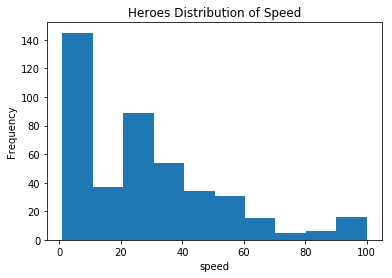

In [38]:
heroes_speed = heroes['Speed']
heroes_speed.plot.hist()
plt.xlabel('speed')
plt.title('Heroes Distribution of Speed')

Let's try a histogram of the `Combat` power of the villains.

Text(0.5,1,'Villains Distribution of Combat')

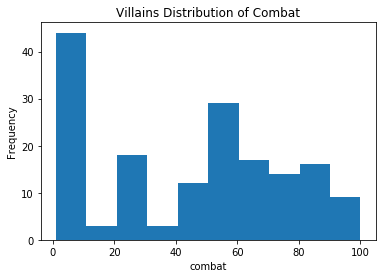

In [37]:
villains_combat = villains['Combat']
villains_combat.plot.hist()
plt.xlabel('combat')
plt.title('Villains Distribution of Combat')

## Additional Queries

There are ways of putting two histograms together on the same plot to compare them. 

Let's compare the speed and combat of the heroes and villains.

First, we'll need to put the `Speed` data of the heroes and villains together in one DataFrame.

In [44]:
villains_speed = villains['Speed']

speed = pd.DataFrame({'heroes_speed': heroes_speed, 'villains_speed': villains_speed})

Then, we can simply plot the DataFrame using the `plot.hist()` method, and it will show both. 
We'll set the `alpha` value to less than 1 to make the histograms slightly transparent, to make the overlap more visible.

Text(0.5,0,'speed')

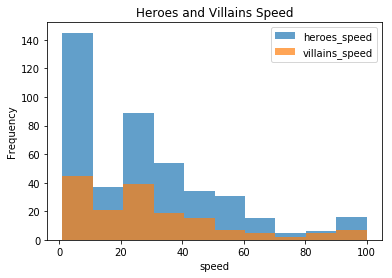

In [46]:
speed.plot.hist(alpha=0.7)
plt.title('Heroes and Villains Speed')
plt.xlabel('speed')

The histogram makes understanding the data distribution far easier. 

As we saw earlier, there are 432 heroes and 165 villains, so the overrepresentation of low-speed heroes explains why the histogram 
looks the way it does.

Let's try the same approach with the `Combat` statistic, to see if there is a similar distribution.

Text(0.5,0,'combat')

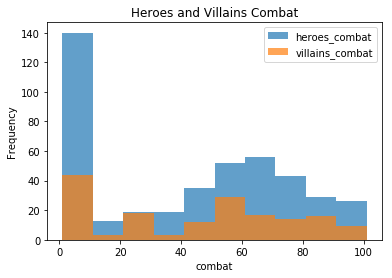

In [48]:
heroes_combat = heroes['Combat']
combat = pd.DataFrame({'heroes_combat': heroes_combat, 'villains_combat': villains_combat})
combat.plot.hist(alpha=0.7)
plt.title('Heroes and Villains Combat')
plt.xlabel('combat')

As before, there are far more heroes than villains, and it seems like most of them have low `Combat` scores.

Let's do the same for `Durability`, to see if heroes or villains are more durable.

Text(0.5,0,'durability')

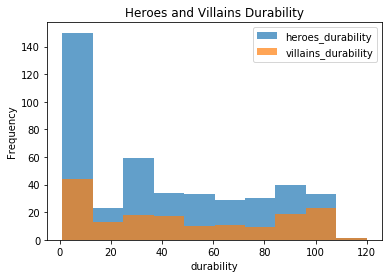

In [52]:
heroes_durability = heroes['Durability']
villains_durability = villains['Durability']
durability = pd.DataFrame({'heroes_durability': heroes_durability, 'villains_durability': villains_durability})
durability.plot.hist(alpha=0.7)
plt.title('Heroes and Villains Durability')
plt.xlabel('durability')

These results are unsurprising, and follow the trend of the earlier histograms. Large numbers of heroes seem to have low durability scores, which causes the data to look like this.